In [1]:
from classy import Class

import os
import copy
import yaml
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

from matplotlib import rc
from scipy.interpolate import interp1d

rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

## warmup
run a fiducial cosmology 

In [2]:
LCDM =  Class()
baseline = {'omega_b':0.0223828,
            'omega_cdm':0.3,
            'h':0.67810,'A_s':2.100549e-09,
            'n_s':0.9660499,
            'tau_reio':0.05430842, 
            'lensing':'yes',
            'background_verbose': 10,
            'input_verbose': 10,
            'output_verbose': 10,
            }
LCDM.set(baseline)
LCDM.set({'output': 'tCl,pCl,lCl','output_verbose': 1,'background_verbose':1})

True

run CLP cosmology...

In [3]:
# add CLP fluid cosmology bc EDE isn't happy 
CLP_common_dict={
    'Omega_fld': 0.5,
    'fluid_equation_of_state': 'CLP',
#    'fraction_fld_ac': 0.09,
#    'w_fld_f':omega_n,
#    'a_c': axion_ac,
#    'Theta_initial_fld': 0.1,
#    'nu_fld': 0.5,
}

models = {'CLP1': Class(), 'CLP2': Class()}

for name, model in models.items():
    model.set(baseline)
    model.set({'output': 'tCl,pCl,lCl'})
    model.set(CLP_common_dict)

CLP1 = models['CLP1']
CLP2 = models['CLP2']

#ADE.set({'ede_parametrization': 'pheno_axion_p',})
#ADE_no_p.set({'ede_parametrization': 'pheno_axion',})

CLP1.set({
    'w0_fld': -0.1,
    'wa_fld': -0.1,
})
CLP2.set({
    'w0_fld': -0.13,
    'wa_fld': -0.15,
})


True

In [4]:
LCDM.compute()
CLP1.compute()
CLP2.compute()

Reading input parameters
Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = 0.298802
Running CLASS version v3.3.0
Computing background
 -> age = 10.788708 Gyr
 -> conformal age = 10163.832339 Mpc
 -> H0 = 67.810000 km/s/Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 7706.738456
    corresponding to conformal time = 49.822509 Mpc
Reading input parameters
Reading input parameters
 -> matched budget equations by adjusting Omega_Lambda = -0.201198
Running CLASS version v3.3.0
Computing background
axion parameters: pba->m_fld  0.000000e+00 /H0, pba->alpha_fld 0.000000e+00/Mpl pba->omega_axion today 0.000000e+00 
Chose ndf15 as generic_evolver
pba->Omega0_fld 5.000000e-01  exp(integral_fld) 5.373885e+33
pba->Omega0_ur 3.717995e-05  exp(integral_fld) 0.000000e+00
 -> age = 9.490442 Gyr
 -> conformal age = 9088.031881 Mpc
 -> H0 = 67.810000 km/s/Mpc
 -> N_eff = 3.044 (summed over all 

## warmup 2  
plot stuff

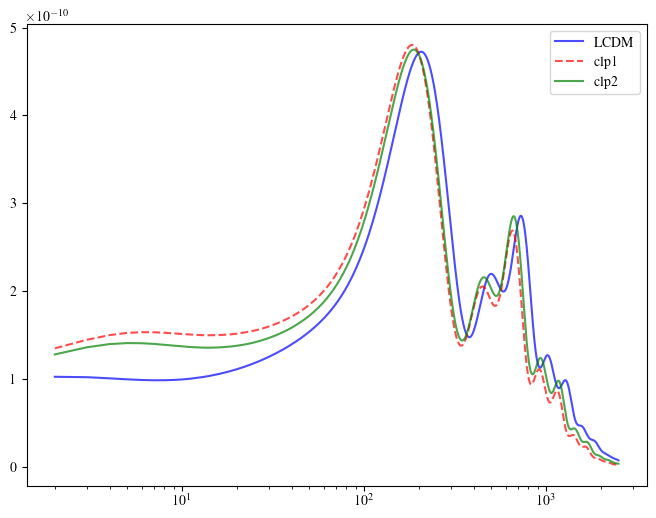

In [5]:
cls_l = LCDM.lensed_cl(2500)
cls1 = CLP1.lensed_cl(2500)
cls2 = CLP2.lensed_cl(2500)
cls_all = [cls_l, cls1, cls2]
colors = ['blue', 'red', 'green']
labels = ['LCDM', 'clp1', 'clp2']
for i in range(3):
    cls = cls_all[i]
    ll = cls['ell'][2:]
    clTT = cls['tt'][2:]
    clEE = cls['ee'][2:]
    clPP = cls['pp'][2:]
    pi = np.pi
    plt.plot(ll,clTT*ll*(ll+1)/2./pi, color=colors[i], linestyle='dashed' if i==1 else 'solid',alpha=0.7, label = labels[i])
    plt.xscale('log')
plt.legend()


## for the equation of state,  
we are looking at background quantities:

In [6]:
bg = CLP1.get_background()
bg_no_p = CLP2.get_background()
print(bg.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_fld', '(.)Omega_fld', '(.)w_fld', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


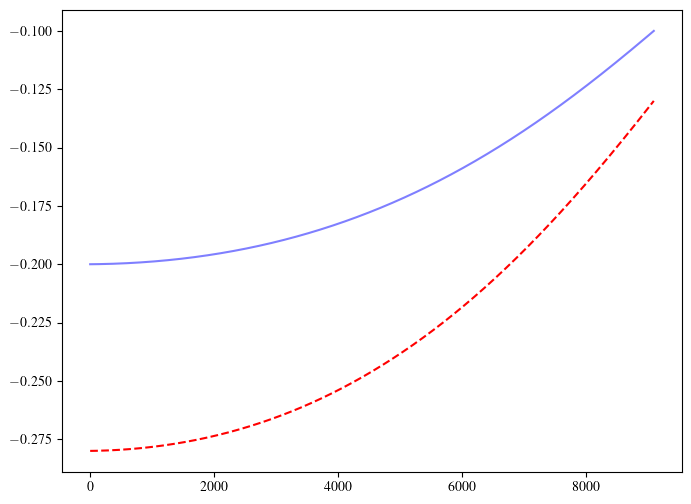

In [7]:
rho_fld_CLP1 = bg['(.)w_fld']
rho_fld_CLP2 = bg_no_p['(.)w_fld']
plt.plot(bg['conf. time [Mpc]'],rho_fld_CLP1, label='rho_fld CLP1', color='blue',alpha=0.5)
plt.plot(bg['conf. time [Mpc]'],rho_fld_CLP2, label='rho_fld CLP2', color='red', linestyle='dashed')
#plt.yscale('log')
#plt.xscale('log')